# Clustering Crypto

In [98]:
!git config --global user.email "aradatus@gmail.com"
!git config --global user.name "Andre Radatus"

In [101]:
git commit --allow-empty -m "Initial commit"

SyntaxError: ignored

In [100]:
!git init
!git remote add origin <git@github.com:radatu/Ch_19_Cryptocurrencies.git>
!git add .a
!git commit -m "Developments"
!git push -u origin main

Reinitialized existing Git repository in /content/.git/
/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git remote add origin <git@github.com:radatu/Ch_19_Cryptocurrencies.git>'
error: open("drive/.shortcut-targets-by-id/1hfnw4pYpSVzUPVsXP2kCYXz-KHwb2buO/Teacher Education Program/2023 - 2024 Academic Calendar.gdoc"): Operation not supported
error: unable to index file 'drive/.shortcut-targets-by-id/1hfnw4pYpSVzUPVsXP2kCYXz-KHwb2buO/Teacher Education Program/2023 - 2024 Academic Calendar.gdoc'
fatal: adding files failed
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	drive/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'origin'


In [70]:

# Initial imports
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [46]:
!pip install hvplot.pandas
!pip install pathlib

import hvplot.pandas
from pathlib import Path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement hvplot.pandas (from versions: none)
ERROR: No matching distribution found for hvplot.pandas
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

### Deliverable 1: Preprocessing the Data for PCA

In [102]:
print(os.getcwd()) # Check current working directory
print(os.listdir()) # Check files in current working directory

/content
['.config', '.git', 'drive', 'sample_data']


In [49]:
# Load the crypto_data.csv dataset.
file_path = ("../content/drive/MyDrive/Colab Notebooks/crypto_data.csv")
crypto_df = pd.read_csv(file_path)
crypto_df.head()

Unnamed: 0   CoinName Algorithm  IsTrading ProofType  TotalCoinsMined  \
0         42    42 Coin    Scrypt       True   PoW/PoS     4.199995e+01   
1        365    365Coin       X11       True   PoW/PoS              NaN   
2        404    404Coin    Scrypt       True   PoW/PoS     1.055185e+09   
3        611  SixEleven   SHA-256       True       PoW              NaN   
4        808        808   SHA-256       True   PoW/PoS     0.000000e+00   

  TotalCoinSupply  
0              42  
1      2300000000  
2       532000000  
3          611000  
4               0

In [58]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [59]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
crypto_df = crypto_df.set_index('Unnamed: 0')
print((len(crypto_df.axes[0]), len(crypto_df.axes[1])))
crypto_df.head(10)

(1144, 6)


CoinName Algorithm  IsTrading ProofType  TotalCoinsMined  \
Unnamed: 0                                                              
42            42 Coin    Scrypt       True   PoW/PoS     4.199995e+01   
365           365Coin       X11       True   PoW/PoS              NaN   
404           404Coin    Scrypt       True   PoW/PoS     1.055185e+09   
611         SixEleven   SHA-256       True       PoW              NaN   
808               808   SHA-256       True   PoW/PoS     0.000000e+00   
1337        EliteCoin       X13       True   PoW/PoS     2.927942e+10   
2015        2015 coin       X11       True   PoW/PoS              NaN   
BTC           Bitcoin   SHA-256       True       PoW     1.792718e+07   
ETH          Ethereum    Ethash       True       PoW     1.076842e+08   
LTC          Litecoin    Scrypt       True       PoW     6.303924e+07   

           TotalCoinSupply  
Unnamed: 0                  
42                      42  
365             2300000000  
404              532000000  
611                 611000  
808                      0  
1337          314159265359  
2015                     0  
BTC               21000000  
ETH                      0  
LTC               84000000

In [60]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(['IsTrading'], axis=1)
crypto_df.head()

CoinName Algorithm ProofType  TotalCoinsMined TotalCoinSupply
Unnamed: 0                                                                
42            42 Coin    Scrypt   PoW/PoS     4.199995e+01              42
365           365Coin       X11   PoW/PoS              NaN      2300000000
404           404Coin    Scrypt   PoW/PoS     1.055185e+09       532000000
611         SixEleven   SHA-256       PoW              NaN          611000
808               808   SHA-256   PoW/PoS     0.000000e+00               0

In [61]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna(axis=0)
print(len(crypto_df))

685


In [62]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
print(len(crypto_df))

532


In [63]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_names = crypto_df[["CoinName"]]
crypto_names.head()

CoinName
Unnamed: 0           
42            42 Coin
404           404Coin
1337        EliteCoin
BTC           Bitcoin
ETH          Ethereum

In [64]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(['CoinName'], axis=1)
crypto_df.head(10)

Algorithm ProofType  TotalCoinsMined TotalCoinSupply
Unnamed: 0                                                           
42                  Scrypt   PoW/PoS     4.199995e+01              42
404                 Scrypt   PoW/PoS     1.055185e+09       532000000
1337                   X13   PoW/PoS     2.927942e+10    314159265359
BTC                SHA-256       PoW     1.792718e+07        21000000
ETH                 Ethash       PoW     1.076842e+08               0
LTC                 Scrypt       PoW     6.303924e+07        84000000
DASH                   X11   PoW/PoS     9.031294e+06        22000000
XMR         CryptoNight-V7       PoW     1.720114e+07               0
ETC                 Ethash       PoW     1.133597e+08       210000000
ZEC               Equihash       PoW     7.383056e+06        21000000

In [65]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns=["Algorithm","ProofType"])
X.head()

TotalCoinsMined TotalCoinSupply  Algorithm_1GB AES Pattern Search  \
Unnamed: 0                                                                      
42             4.199995e+01              42                                 0   
404            1.055185e+09       532000000                                 0   
1337           2.927942e+10    314159265359                                 0   
BTC            1.792718e+07        21000000                                 0   
ETH            1.076842e+08               0                                 0   

            Algorithm_536  Algorithm_Argon2d  Algorithm_BLAKE256  \
Unnamed: 0                                                         
42                      0                  0                   0   
404                     0                  0                   0   
1337                    0                  0                   0   
BTC                     0                  0                   0   
ETH                     0                  0                   0   

            Algorithm_Blake  Algorithm_Blake2S  Algorithm_Blake2b  \
Unnamed: 0                                                          
42                        0                  0                  0   
404                       0                  0                  0   
1337                      0                  0                  0   
BTC                       0                  0                  0   
ETH                       0                  0                  0   

            Algorithm_C11  ...  ProofType_PoW/PoS  ProofType_PoW/PoS   \
Unnamed: 0                 ...                                          
42                      0  ...                  1                   0   
404                     0  ...                  1                   0   
1337                    0  ...                  1                   0   
BTC                     0  ...                  0                   0   
ETH                     0  ...                  0                   0   

            ProofType_PoW/PoW  ProofType_PoW/nPoS  ProofType_Pos  \
Unnamed: 0                                                         
42                          0                   0              0   
404                         0                   0              0   
1337                        0                   0              0   
BTC                         0                   0              0   
ETH                         0                   0              0   

            ProofType_Proof of Authority  ProofType_Proof of Trust  \
Unnamed: 0                                                           
42                                     0                         0   
404                                    0                         0   
1337                                   0                         0   
BTC                                    0                         0   
ETH                                    0                         0   

            ProofType_TPoS  ProofType_Zero-Knowledge Proof  ProofType_dPoW/PoW  
Unnamed: 0                                                                      
42                       0                               0                   0  
404                      0                               0                   0  
1337                     0                               0                   0  
BTC                      0                               0                   0  
ETH                      0                               0                   0  

[5 rows x 98 columns]

In [66]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [67]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [68]:
# Create a DataFrame with the three principal components.
pcax = pca.fit_transform(X_scaled)

pcs_df = pd.DataFrame(
            data=pcax, 
            columns=["PC 1",
                     "PC 2",
                     "PC 3"],
            index=X.index
            )

pcs_df.head(10)

PC 1      PC 2      PC 3
Unnamed: 0                              
42         -0.333982  1.000097 -0.530916
404        -0.317320  1.000145 -0.531120
1337        2.302895  1.594021 -0.577169
BTC        -0.145040 -1.322092  0.180858
ETH        -0.144199 -2.054499  0.380844
LTC        -0.162634 -1.137759  0.007589
DASH       -0.398169  1.252995 -0.539744
XMR        -0.141262 -2.196551  0.364762
ETC        -0.142641 -2.054607  0.380846
ZEC        -0.164741 -2.125849  0.489745

### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

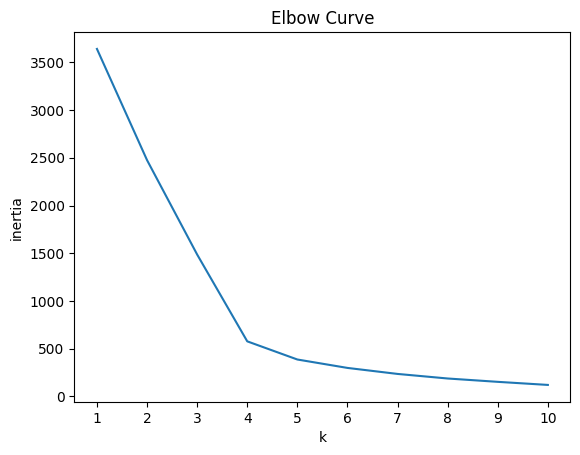

In [71]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

elbow = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow)
# df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

plt.plot(k, inertia)
plt.title('Elbow Curve')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(k)
plt.show()

Running K-Means with `k=4`

In [83]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [84]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatenate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, pcs_df], axis=1)

# Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies.
clustered_df = pd.concat([clustered_df, crypto_names], axis=1)

# Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = predictions

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


Algorithm ProofType  TotalCoinsMined TotalCoinSupply  \
Unnamed: 0                                                              
42                  Scrypt   PoW/PoS     4.199995e+01              42   
404                 Scrypt   PoW/PoS     1.055185e+09       532000000   
1337                   X13   PoW/PoS     2.927942e+10    314159265359   
BTC                SHA-256       PoW     1.792718e+07        21000000   
ETH                 Ethash       PoW     1.076842e+08               0   
LTC                 Scrypt       PoW     6.303924e+07        84000000   
DASH                   X11   PoW/PoS     9.031294e+06        22000000   
XMR         CryptoNight-V7       PoW     1.720114e+07               0   
ETC                 Ethash       PoW     1.133597e+08       210000000   
ZEC               Equihash       PoW     7.383056e+06        21000000   

                PC 1      PC 2      PC 3          CoinName  Class  
Unnamed: 0                                                         
42         -0.333982  1.000097 -0.530916           42 Coin      0  
404        -0.317320  1.000145 -0.531120           404Coin      0  
1337        2.302895  1.594021 -0.577169         EliteCoin      0  
BTC        -0.145040 -1.322092  0.180858           Bitcoin      3  
ETH        -0.144199 -2.054499  0.380844          Ethereum      3  
LTC        -0.162634 -1.137759  0.007589          Litecoin      3  
DASH       -0.398169  1.252995 -0.539744              Dash      0  
XMR        -0.141262 -2.196551  0.364762            Monero      3  
ETC        -0.142641 -2.054607  0.380846  Ethereum Classic      3  
ZEC        -0.164741 -2.125849  0.489745             ZCash      3

### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

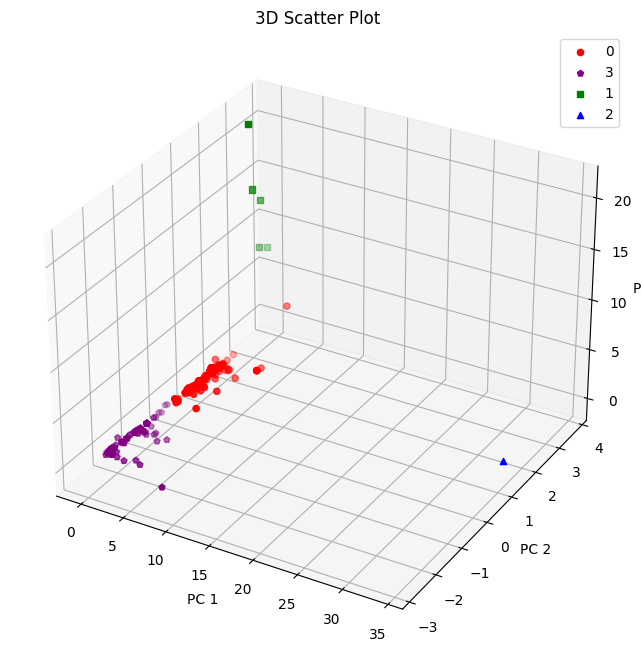

In [86]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8)) # Create empty fig object
ax = fig.add_subplot(111, projection='3d')

colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple'}
markers = {0: 'o', 1: 's', 2: '^', 3: 'p'}

for c in clustered_df['Class'].unique():
    clustered_subset = clustered_df[clustered_df['Class'] == c]
    x = clustered_subset['PC 1']
    y = clustered_subset['PC 2']
    z = clustered_subset['PC 3']
    ax.scatter(x, y, z, c=colors[c], marker=markers[c], label=c)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D Scatter Plot')
ax.legend()

plt.show()

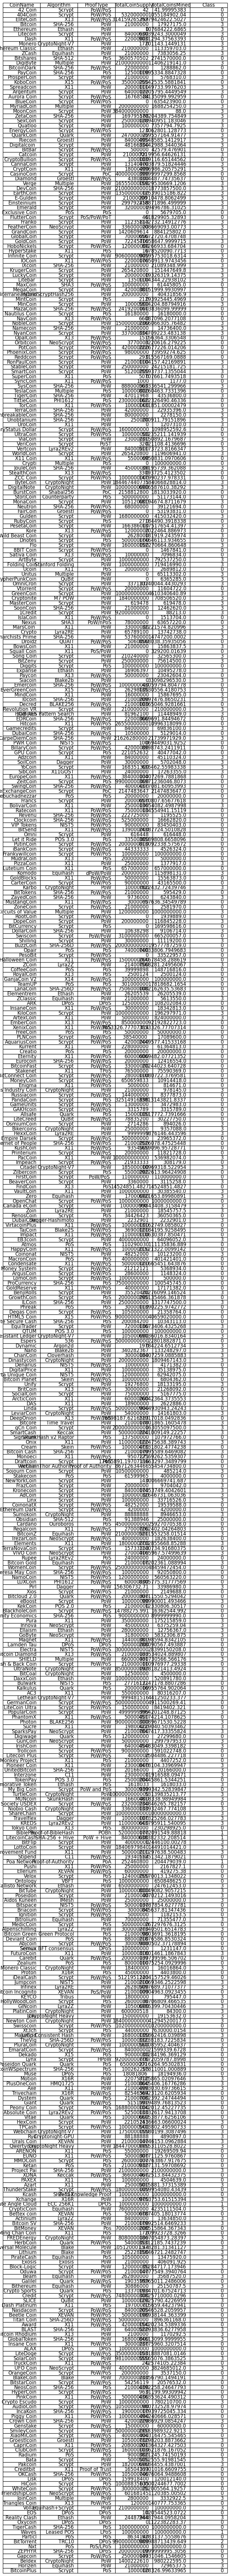

In [90]:
# Create a table with tradable cryptocurrencies.
fig, ax = plt.subplots(figsize=(10, 6))

column_labels = ["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "Class"]
table_data = clustered_df[["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "Class"]].values

ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=table_data, colLabels=column_labels, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.show()

# # Create a table with tradable cryptocurrencies.
# clustered_df.hvplot.table(columns=["CoinName",
#                                    "Algorithm",
#                                    "ProofType",
#                                    "TotalCoinSupply",
#                                    "TotalCoinsMined",
#                                    "Class"], sortable=True, selectable=True)



In [91]:
# Print the total number of tradable cryptocurrencies.
print(len(clustered_df))

532


In [92]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
X_clust = clustered_df[['TotalCoinSupply','TotalCoinsMined']]
X_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(X_clust)

X_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [93]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(data = X_scaled, columns=['TotalCoinSupply', 
                                                  'TotalCoinsMined'], 
                       index=clustered_df.index)


# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df = pd.concat([plot_df, clustered_df['CoinName']], axis=1)

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df = pd.concat([plot_df, clustered_df['Class']], axis=1)

plot_df.head(10)

TotalCoinSupply  TotalCoinsMined          CoinName  Class
Unnamed: 0                                                           
42             4.200000e-11         0.000000           42 Coin      0
404            5.320000e-04         0.001066           404Coin      0
1337           3.141593e-01         0.029576         EliteCoin      0
BTC            2.100000e-05         0.000018           Bitcoin      3
ETH            0.000000e+00         0.000109          Ethereum      3
LTC            8.400000e-05         0.000064          Litecoin      3
DASH           2.200000e-05         0.000009              Dash      0
XMR            0.000000e+00         0.000017            Monero      3
ETC            2.100000e-04         0.000115  Ethereum Classic      3
ZEC            2.100000e-05         0.000007             ZCash      3

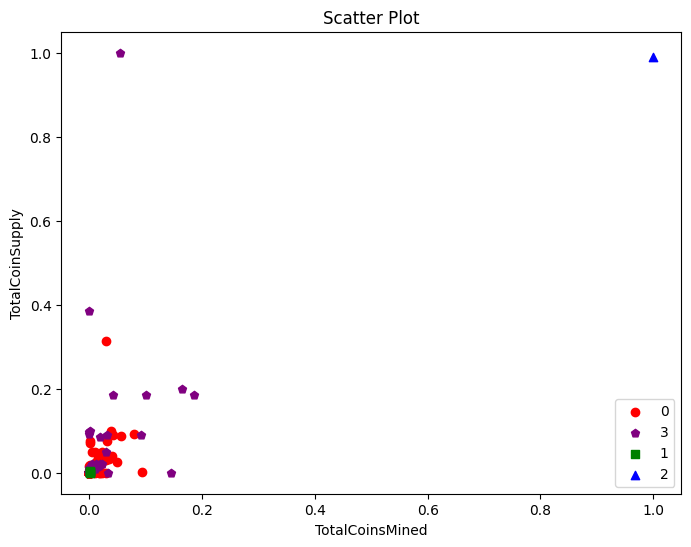

In [97]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# plot_df.hvplot.scatter(x="TotalCoinsMined", 
                      #  y="TotalCoinSupply", 
                      #  hover_cols= "CoinName", 
                      #  by="Class")

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors and markers for each class
colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'purple'}
markers = {0: 'o', 1: 's', 2: '^', 3: 'p'}

# Loop through each class and plot its scatter plot
for c in plot_df['Class'].unique():
    plot_subset = plot_df[plot_df['Class'] == c]
    x = plot_subset['TotalCoinsMined']
    y = plot_subset['TotalCoinSupply']
    ax.scatter(x, y, c=colors[c], marker=markers[c], label=c)

# Set axis labels and title
ax.set_xlabel('TotalCoinsMined')
ax.set_ylabel('TotalCoinSupply')
ax.set_title('Scatter Plot')

# Add legend
ax.legend()

# Show the plot
plt.show()